## Les selvsamlede data inn i python

I denne oppgaven ser vi videre på datasettet som Ragnhild Hannaas har hentet inn. Vi sammenlignet dataverdiene med verdier fra Seklima.met.no i oppgaven [Del4_les_csv_fil](https://github.com/irendundas/EkteData/blob/main/Level1_Temperaturoppgaven/Del4_les_csv_fil.ipynb), og nå ser vi videre på hvordan man kan behandle feil eller mangler i et datasett. Datasettet er på samme format som datasettene NAT624-studentene samler inn selv.

**Importer pakkene du trenger og last inn datasettet med Pandas**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Tips:** Cellen under er veldig praktisk å inkludere hvis du skal lage en del figurer. Den gjør at all lik type figur-tekst automatisk settes til samme størrelse. 

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
# Endre denne stien til der du har EkteData filene på din PC
sti='W:/Work/Documents/EkteData/EkteData/data'
# Endre dette filnavnet til det du har kalt filen du nettopp lastet ned. 
fil='/4-6_januar_Temperaturegistrering_AB-vei.csv'

Husk at du finner informasjon om hvordan man leser inn csv-filer i python i både forrige oppgave [Del4_les_csv_fil.ipynb](https://github.com/irendundas/EkteData/blob/main/Level1_Temperaturoppgaven/Del4_les_csv_fil.ipynb), i oversikten over [huskeregler](https://github.com/irendundas/EkteData/blob/main/Kom_i_gang/Huskeregler.ipynb), og i dokumentasjonen til funksjonen [her](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [4]:
df=pd.read_csv(
    sti+fil, sep=',', engine='python',
    parse_dates=['Time'], 
    encoding= 'unicode_escape'
)

In [5]:
df

,Temp AB-vei,Time,Celsius(°C),Comments,Serial Number
0,1,2022-01-04 15:00:00,4.0,NaN,60039020.0
1,2,2022-01-04 15:01:00,4.0,NaN,NaN
2,3,2022-01-04 15:02:00,4.0,NaN,NaN
3,4,2022-01-04 15:03:00,4.0,NaN,NaN
4,5,2022-01-04 15:04:00,4.0,NaN,NaN
...,...,...,...,...,...
2569,2570,2022-01-06 09:49:00,9.5,NaN,NaN
2570,2571,2022-01-06 09:50:00,10.5,NaN,NaN
2571,2572,2022-01-06 09:51:00,11.0,NaN,NaN
2572,2573,2022-01-06 09:52:00,12.0,NaN,NaN


Konverter pandas DataFramen til et numpy array. Dette tar hånd om tidsaksen bedre når man plotter. 

In [6]:
data=df.to_numpy()

In [7]:
data

array([[1, Timestamp('2022-01-04 15:00:00'), 4.0, nan, 60039020.0],
       [2, Timestamp('2022-01-04 15:01:00'), 4.0, nan, nan],
       [3, Timestamp('2022-01-04 15:02:00'), 4.0, nan, nan],
       ...,
       [2572, Timestamp('2022-01-06 09:51:00'), 11.0, nan, nan],
       [2573, Timestamp('2022-01-06 09:52:00'), 12.0, nan, nan],
       [2574, Timestamp('2022-01-06 09:53:00'), 12.5, nan, nan]],
      dtype=object)

Lagre tidskolonnen og temperaturkolonnen i hver sine vektorer: `tid` og `temp`

In [8]:
tid=np.copy(data[:,1])
temp=np.copy(data[:,2])

## Del 1: Oppdag avvik i et datasett
Lag en figur for å inspisere datasettet. 

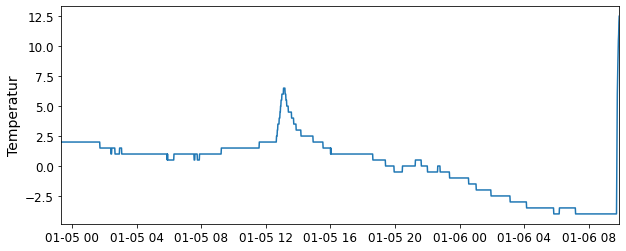

In [9]:
plt.figure(figsize=(10,4))
plt.plot(tid,temp)
plt.xlim(tid[500], tid[-1])
plt.ylabel('Temperatur')
plt.show()

Dette ser litt rart ut - her trenger vi å vite litt om datainnhentingsprosessen for å forstå hva som må forklares av feilkilder og hva som er faktiske temperaturendringer. Siden vi har et datasett lastet ned fra Seklima.met.no fra nesten det samme området kan vi starte med å sammenligne datasettet vårt med Seklima.met.no sitt, slik vi gjorde i [oppgave 4](https://github.com/irendundas/EkteData/blob/main/Level1_Temperaturoppgaven/Del4_les_csv_fil.ipynb).

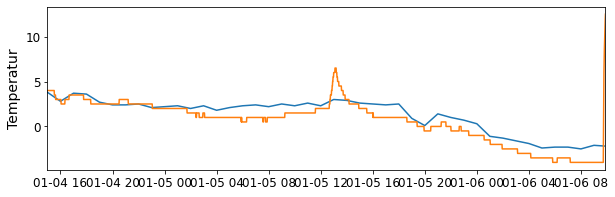

In [10]:
# Endre denne stien til der du har EkteData filene på din PC
sti='W:/Work/Documents/EkteData/MyProg'
# Endre dette filnavnet til det du har kalt filen du nettopp lastet ned. 
fil='/timesnedbør_Bergen_Januar.csv'

df_Florida = pd.read_csv(
    sti+fil, 
    sep=';', 
    decimal=',', 
    parse_dates=['Tid(norsk normaltid)'],
    dayfirst=True
)

tid_Florida=df_Florida['Tid(norsk normaltid)'][:-1]
temp_Florida=df_Florida['Lufttemperatur'][:-1]

tid_Florida=tid_Florida.to_numpy()
temp_Florida=temp_Florida.to_numpy()

plt.figure(figsize=(10,3))
plt.plot(tid_Florida,temp_Florida)
plt.plot(tid, temp)
plt.ylabel('Temperatur')
plt.xlim(tid[0], tid[-1])
plt.show()

**Mulig feilkilde nr 1**
Det er for eksempel to hopp i temperatur: ett etter kl 12 den 5. januar, og ett helt på slutten av tidsserien. Er instrumentet blitt flyttet? Lå instrumentet i skyggen eller i solen? Når man samler inn data er det viktig å holde oversikten over slike forhold som kan påvirke datasettet, for eksempel notere ting ned i en log-bok. Man vet ikke alltid hva slags detaljer man kan ha nytte av å ha notert ned i etterkant, så noter heller litt mye enn litt lite.  

**Mulig feilkilde nr 2**
En annen ting som kan være lurt å sjekke om man bruker et instrument man ikke kjenner til så godt er om den har lagret data med konstant frekvens. I figuren over ser det ut som om at noen perioder har høyere oppløsning enn andre. Er det hull i datasettet eller er bare temperaturen veldig jevn i noen perioder? `Pandas` har en funksjon for å sjekke dette: `pd.infer_freq()`.

In [11]:
# Resultatet er 'T', altså er det konstant frekvens på timesoppløsning.
pd.infer_freq(df['Time'])

'T'

Datapunktene har altså jevn frekvens, så feilkilde nr 2 er ikke en faktisk feilkilde, dataveridiene er bare veldig jevne i perioder. 

## Oppgave 1
Hvorfor er det viktig å identifisere slike feil i datasettet? Hva slags feil kan man få om man ikke oppdager dette? 

Beregn gjennomsnittstemperatur og standardavvik til den ubehandlede temperatur-tidsserien. Finn også medianen. Det har vi ikke beregnet før, så her trengs et google-søk. Lengre ned ser vi på forskjellen etter at datasettet er behandlet. 

In [12]:
np.median(temp), np.mean(temp), np.std(temp)

(1.0, 0.5864413364413364, 2.3583010493594996)

### Del 2: Hvordan behandle slike avvik?

De tre metodene under er alle gyldige og gode. Hvilken metode man bruker må man vurdere ut ifra avviket og datasettet. 
- sett ugyldige verdier til NaN
- erstatt ugyldige verdier med gjennomsnittsverdier
- fjern de ugyldige verdiene og interpoler med en funksjon

Ofte er det en god løsning å sette verdier man mangler eller er usikre på om er gyldige til `NaN`. Da får man et hull i datasettet sitt, men det er bedre å basere et gjennomsnitt på litt færre verdier eller å ha et hull i en figur, enn å bruke verdier man vet man ikke kan stole på. 


### Del 3: sett spiken i slutten av datasettet til NaN
Den siste "spiken" i figuren over er et tilfelle hvor det er en god ide å sette verdien til `NaN`. Siden det er helt på slutten av tidsserien har det veldig lite å si å fjerne disse datapunktene. Første steg er å finne verdiene som må settes til `NaN` for å få fjernet denne spiken. 

**Metode 1**: Siden dette er et så lite datasett kan man inspisere de siste verdiene for å finne hva man vil sette til NaN.

In [13]:
temp[-20:]

array([-4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -0.5,
       3.5, 6.0, 7.5, 8.5, 9.5, 10.5, 11.0, 12.0, 12.5], dtype=object)

In [14]:
temp[-10:]

array([-0.5, 3.5, 6.0, 7.5, 8.5, 9.5, 10.5, 11.0, 12.0, 12.5],
      dtype=object)

In [15]:
# Jeg setter de siste 10 verdiene til NaN: det er lenge stabilt 
# på -4 før det begynner å øke
temp[-10:]=np.nan

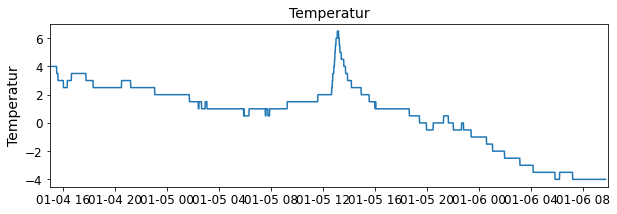

In [16]:
plt.figure(figsize=(10,3))
plt.plot(tid,temp)
plt.xlim(tid[0], tid[-1])
plt.title('Temperatur')
plt.ylabel('Temperatur')
plt.show()

In [17]:
temp[-20:]

array([-4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=object)

**Metode 2: Hva om det ikke er praktisk mulig å fikse det manuelt?**

Hadde dette vært et større datasett ville ikke manuell inspeksjon fungert. Det samme gjelder om det var flere slike spiker. En fremgangsmåte som kan fungere er å finne hvor det skjer store endringer i verdier. Dette vil identifisere spiker. Vi prøver:

In [18]:
# Last inn temp på nytt for et nytt forsøk:
temp=np.copy(data[:,2])

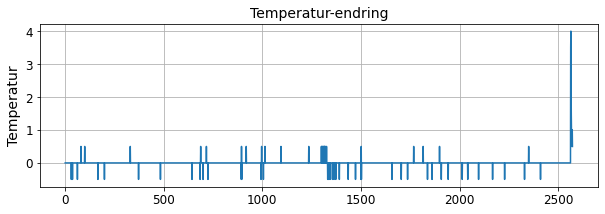

In [19]:
# plot differansen mellom hvert datapunkt med np.diff():
plt.figure(figsize=(10,3))
diff=np.diff(temp)
plt.plot(diff)
plt.title('Temperatur-endring')
plt.ylabel('Temperatur')
plt.grid()
plt.show()

Figuren over viser hvor mye temperaturen endrer seg mellom hvert tidssteg. Dette kan hjelpe oss med å sette en grense for hvor mye endring vi ser på som fysisk realistisk. Jeg velger å sette grensen på 1 grad mellom hvert tidssteg.

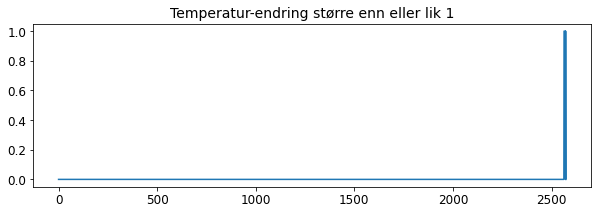

In [20]:
plt.figure(figsize=(10,3))
# plot kun indeksene der diff er større enn eller lik 1
plt.plot(diff>=1)
plt.title('Temperatur-endring større enn eller lik 1')
plt.show()


Alle disse tilfellene er konsentrert i slutten av tidsserien, som forventet siden det er der vi ser den største spiken. 

Nå trenger vi å vite indeksen til tidsstegene med større temperaturendring enn 1 grad. 

In [21]:
diff>=1

array([False, False, False, ..., False,  True, False])

Dette er en lang liste med enten `True` eller `False`. Der diff er strørre eller lik 1 står det `True`. Vi kan nå finne indeksene der `diff>=1` er `True` med funksjonen `np.where()` som vi er kjent med fra tidligere, f.eks. i [oppgave 2](https://github.com/irendundas/EkteData/blob/main/Level1_Temperaturoppgaven/Del2_Indeksering.ipynb).

In [22]:
np.where((diff>=1)==True)

(array([2563, 2564, 2565, 2566, 2567, 2568, 2569, 2571], dtype=int64),)

Vi setter alle verdiene fra og med den første ugyldige verdiene til NaN

In [23]:
nanid=np.where((diff>=1)==1)[0][0]
nanid

2563

In [24]:
temp[nanid:]=np.nan
tid[nanid:]=np.nan

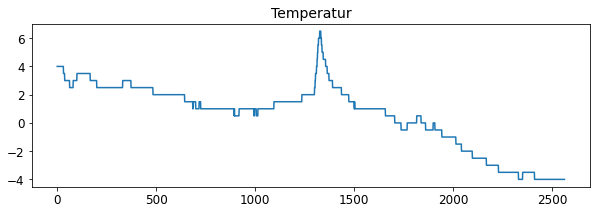

In [25]:
plt.figure(figsize=(10,3))
plt.plot(temp)
plt.title('Temperatur')
plt.show()

I dette tilfelle virket kanskje ikke dette så effektivt i forhold til den manuelle metoden, men hvis det var mange spiker strødd ut i datsettet hadde metode 2 absolutt vært mest effektiv fordi man finner indeksene til de ugyldige verdiene automatisk heller enn med inspeksjon. 


### Del 4: spiken i midten av tidsserien

Men hva med **spiken i midten av tidsserien**? Denne er ikke like lett å identifisere i tid: Endringen er ikke så sterk som spiken på slutten var, og verdiene er ikke så høye. Siden tidsseriene vi jobber med i dette kurset generelt ikke er så lange identifiserer vi denne manuelt og ser på tre forskjellige måter å behandle disse datapunktene:
- sett til NaN
- sett til gjennomsnittet av punktene ved siden
- bruk en funksjon til å interpolere. 

Om det ikke var praktisk mulig å identifisere spiken manuelt måtte vi laget en metode (en algoritme) som identifiserte den for oss. I figuren over differanse har f.eks. mange tidssteg på rad stor differanse der midt-spiken er. Dette kunne vært et kritere i en slik algoritme. 

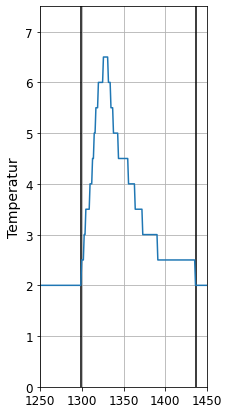

In [35]:
plt.figure(figsize=(3,7))
plt.plot(temp)
plt.grid()
plt.xlim(1250, 1450)
plt.ylim(0, 7.5)

plt.vlines(1299, 0, 7.5, 'k')
plt.vlines(1436, 0, 7.5, 'k')
plt.ylabel('Temperatur')
plt.show()

In [36]:
start=1299
stop=1436+1

Vi begrenser området vi vil behandle til verdiene mellom indeks 1299 og 1436. I denne manuelle metoden kan man rett og slett prøve seg frem med x-verdiene i `plt.vlines()` frem til man identifiserer grensene til spiken. 

#### Metode 1: Sett til NaN:

In [37]:
# Bruk 1436+1 for å få med den siste indeksen
temp[start:stop]=np.nan

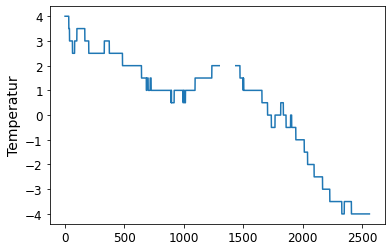

In [38]:
plt.plot(temp)
plt.ylabel('Temperatur')
plt.show()

#### Metode 2: Sett verdiene der spiken er til gjennomsnittet av punktene til sidene

Finn gjennomsnittet til punktene ved siden av. Bruk f.eks. 10 punkter fra hver side.

In [39]:
# Finn gjennomsnittet til punktene ved siden av. Bruk f.eks. 10 punkter fra hver side.
mean=np.nanmean(temp[start-10:stop+10], dtype='float64')
mean

2.0

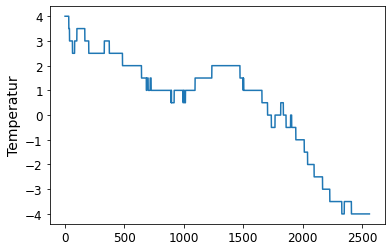

In [40]:
temp[start:stop]=mean

plt.plot(temp)
plt.ylabel('Temperatur')
plt.show()

#### Metode 3: Bruk en funksjon til å interpolere

Vi bruker pandas sin fuksjon `interpolate` til å lineært interpolere `temp`. 

In [46]:
temp=np.copy(data[:,2])
tid=np.copy(data[:,1])

# For å bruke funksjonen interpolate() må verdiene i "temp" være floats 
temp=np.array(temp, dtype='float64')

# Fjern de siste ti verdiene (den siste spiken)
temp=temp[:-10]
tid=tid[:-10]

# Sett verdiene i den midterste spiken til NaN
temp[1299:1436+1]=np.nan

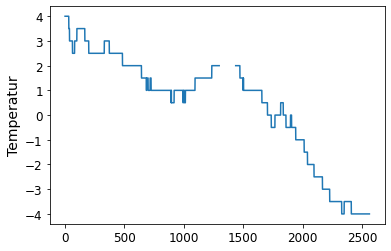

In [47]:
plt.plot(temp)
plt.ylabel('Temperatur')
plt.show()

In [48]:
# Gjør arrayet "temp" om til en Pandas DataFrame slik at Pandas sine funksjoner
# kan brukes
temp_interp=np.copy(temp)
temp_interp=pd.DataFrame(temp_interp)

# Lineært interpoler temp
temp_interp=temp_interp.interpolate()

In [49]:
# Konverter temp tilbake til et Numpy array. 
temp_interp=temp_interp.to_numpy()

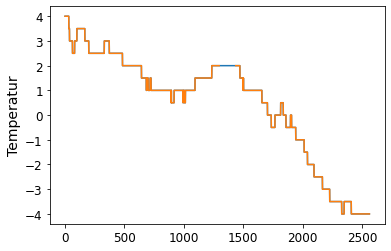

In [51]:
plt.plot(temp_interp)
plt.plot(temp)
plt.ylabel('Temperatur')
plt.show()

Hvis vi nå plotter dette sammen med temperaturmålingene fra Florida, Bergen fra samme periode ser det en god del bedre ut enn før vi behandlet det to spikene:

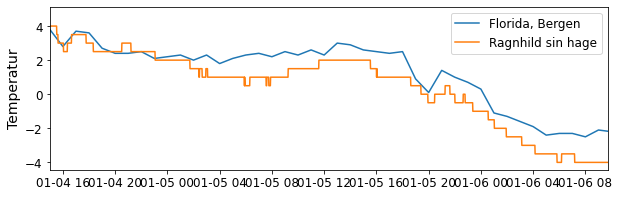

In [52]:
plt.figure(figsize=(10,3))
plt.plot(tid_Florida,temp_Florida, label='Florida, Bergen')
plt.plot(tid, temp_interp, label='Ragnhild sin hage')
plt.ylabel('Temperatur')
plt.xlim(tid[0], tid[-1])
plt.legend()
plt.show()

## Oppgave 2
Finn igjen gjennomsnittet, medianen og standardsvviket til temp og sammenlign verdiene med det du fant før spikene i datasettet var tatt vekk. Var det verdt det å fjerne spikene? Hvorfor?

In [54]:
np.median(temp_interp), np.mean(temp_interp), np.std(temp_interp)

(1.0, 0.4676287051482059, 2.1916122530585462)

In [ ]:
(1.0, 0.5864413364413364, 2.3583010493594996)


## Oppgave 3
I cellen under blir det introdusert et par ekstra feil. Identifiser feilene og bruk de metodene du vil til å fjerne dem. Du kan prøve å fjerne flere på en gang med samme metode, eller du kan fjerne ulike feil med ulike metoder. 

In [39]:
temp[:7]=11

In [40]:
temp[(temp>=-2.7)&(temp<=-2)]=-5

In [41]:
temp[temp==0.5]=-7

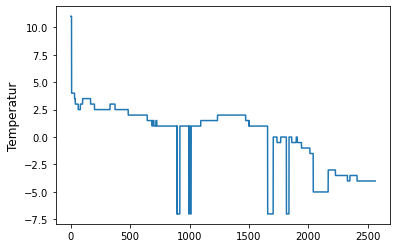

In [42]:
plt.plot(temp)
plt.ylabel('Temperatur')
plt.show()